In [1]:
using Distributions
E(f, dist) = sum(x -> f(x)*pdf(dist, x), support(dist))
mu(k, dist; m=mean(dist)) = E(x ->(x-m)^k, dist)
using HypothesisTests
using Random
using StatsBase
using StatsPlots
default(fmt=:png, titlefontsize=10, tickfontsize=6,
    size=(400, 250))

In [2]:
function sim(distX, distY, m, n; L=10^5)
    pval = Vector{Float64}(undef, L)
    tmpX = [Vector{Float64}(undef, m) for _ in 1:Threads.nthreads()]
    tmpY = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(distX, tmpX[tid])
        Y = rand!(distY, tmpY[tid])
        pval[i] = pvalue(MannWhitneyUTest(X, Y))
    end
    _ecdf_pval = ecdf(pval)
    ecdf_pval(x) = _ecdf_pval(x)
    ecdf_pval
end

sim (generic function with 1 method)

distX = dist7(1 / 16, 0, 7 / 16) = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.0625, 0.0, 0.4375, 0.0, 0.4375, 0.0, 0.0625]
)

(var(distX), mu(4, distX), mu(6, distX)) = (2.0, 11.0, 92.0)



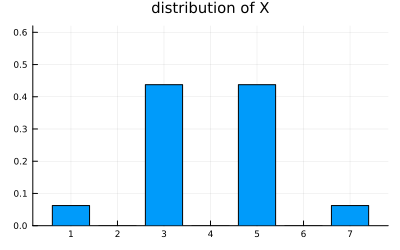

In [3]:
dist7(a, b, c) = Categorical(a, b, c, 1-2(a+b+c), c, b ,a)
@show distX = dist7(1/16, 0, 7/16)
s2, m4, m6 = @show var(distX), mu(4, distX), mu(6, distX)
println()

P = bar(distX; label="", ylim=(0, 0.62), c=1)
title!("distribution of X")

distY = dist7(a, b, c) = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.03333333333333333, 0.17500000000000002, 0.0, 0.5833333333333333, 0.0, 0.17500000000000002, 0.03333333333333333]
)

(var(distY), mu(4, distY), mu(6, distY)) = (2.0, 11.0, 71.0)



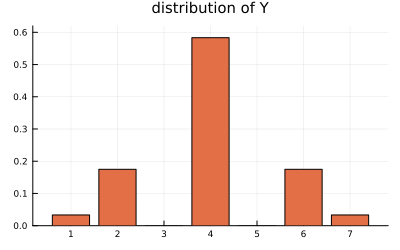

In [4]:
t = 1/30
a = t
b = (m4 - s2 - 2(3^4-3^2)*a)/(2(2^4 - 2^2))
c = s2/2 - (3^2*a + 2^2*b)
@show distY = dist7(a, b, c)
@show var(distY), mu(4, distY), mu(6, distY)
println()

Q = bar(distY; label="", ylim=(0, 0.62), c=2)
title!("distribution of Y")

In [5]:
function show_sim(distX, distY, m, n; L=10^6, P=P, Q=Q)
    ecdf_pval = sim(distX, distY, m, n; L)

    R = plot(ecdf_pval, 0, 0.1; label="")
    plot!(identity; label="", ls=:dot, c=:gray)
    plot!(xguide="α", yguide="probability of p-value ≤ α")
    plot!(xtick=0:0.01:1, ytick=0:0.01:1)
    title!("Mann-Whitney U-test (sizes of X, Y = $m, $n)")
    plot!(size=(400, 400))

    @show distX distY
    @show mean(distX), var(distX), kurtosis(distX), mu(6, distX)
    @show mean(distY), var(distY), kurtosis(distY), mu(6, distY)
    println()
    @show ecdf_pval(0.05)
    println()

    plot(P, Q, R; layout=@layout[[a; b] c], size=(800, 400))
end

show_sim (generic function with 1 method)

distX = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.0625, 0.0, 0.4375, 0.0, 0.4375, 0.0, 0.0625]
)

distY = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.03333333333333333, 0.17500000000000002, 0.0, 0.5833333333333333, 0.0, 0.17500000000000002, 0.03333333333333333]
)

(mean(distX), var(distX), kurtosis(distX), mu(6, distX)) = (4.0, 2.0, -0.25, 92.0)
(mean(distY), var(distY), kurtosis(distY), mu(6, distY)) = (4.0, 2.0, -0.25, 71.0)

ecdf_pval(0.05) = 0.068668



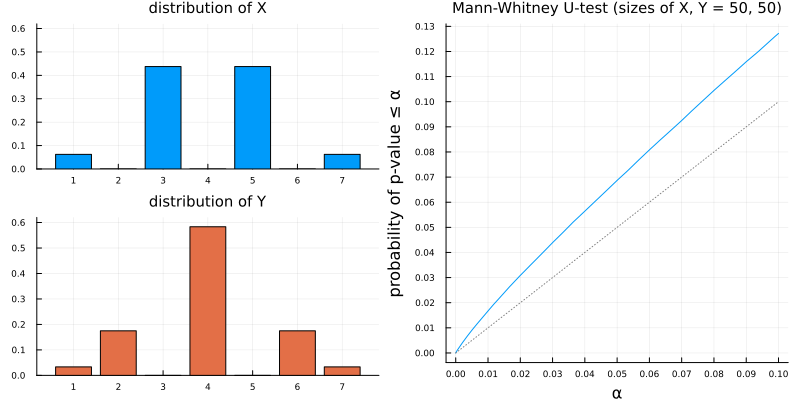

In [6]:
show_sim(distX, distY, 50, 50)

distX = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.0625, 0.0, 0.4375, 0.0, 0.4375, 0.0, 0.0625]
)

distY = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.03333333333333333, 0.17500000000000002, 0.0, 0.5833333333333333, 0.0, 0.17500000000000002, 0.03333333333333333]
)

(mean(distX), var(distX), kurtosis(distX), mu(6, distX)) = (4.0, 2.0, -0.25, 92.0)
(mean(distY), var(distY), kurtosis(distY), mu(6, distY)) = (4.0, 2.0, -0.25, 71.0)

ecdf_pval(0.05) = 0.077882



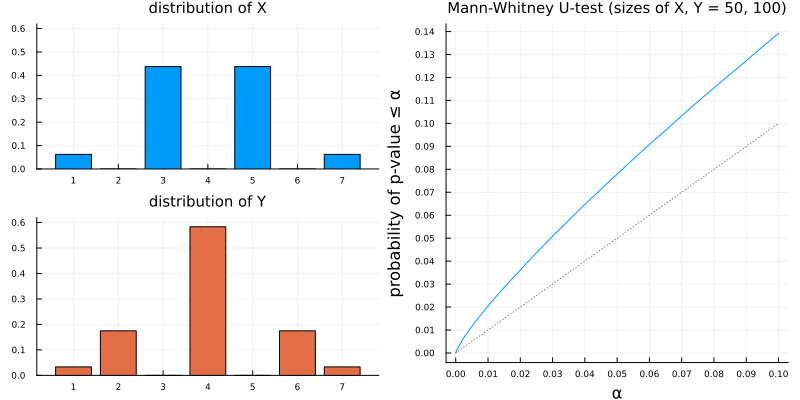

In [7]:
show_sim(distX, distY, 50, 100)

distX = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.0625, 0.0, 0.4375, 0.0, 0.4375, 0.0, 0.0625]
)

distY = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.03333333333333333, 0.17500000000000002, 0.0, 0.5833333333333333, 0.0, 0.17500000000000002, 0.03333333333333333]
)

(mean(distX), var(distX), kurtosis(distX), mu(6, distX)) = (4.0, 2.0, -0.25, 92.0)
(mean(distY), var(distY), kurtosis(distY), mu(6, distY)) = (4.0, 2.0, -0.25, 71.0)

ecdf_pval(0.05) = 0.090312



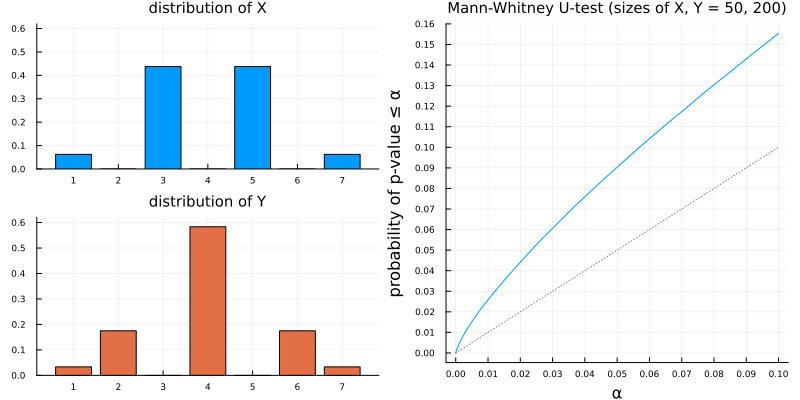

In [8]:
show_sim(distX, distY, 50, 200)

distX = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.0625, 0.0, 0.4375, 0.0, 0.4375, 0.0, 0.0625]
)

distY = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.03333333333333333, 0.175, 0.0, 0.5833333333333334, 0.0, 0.175, 0.03333333333333333]
)

(mean(distX), var(distX), kurtosis(distX), mu(6, distX)) = (4.0, 2.0, -0.25, 92.0)
(mean(distY), var(distY), kurtosis(distY), mu(6, distY)) = (4.0, 2.0, -0.25, 71.0)

ecdf_pval(0.05) = 0.089957



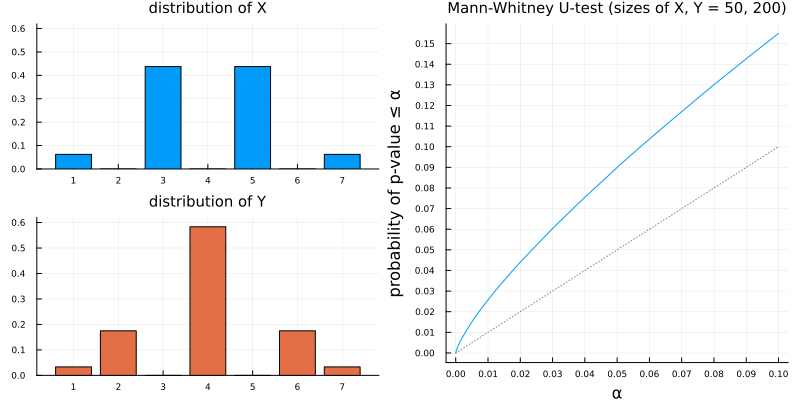

In [9]:
distX = dist7(1/16, 0, 7/16)
distY = dist7(1/30, 7/40, 0)
show_sim(distX, distY, 50, 200)

distX = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.06944444444444445, 0.0, 0.375, 0.11111111111111116, 0.375, 0.0, 0.06944444444444445]
)

distY = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.044444444444444446, 0.15, 0.0, 0.6111111111111112, 0.0, 0.15, 0.044444444444444446]
)

(mean(distX), var(distX), kurtosis(distX), mu(6, distX)) = (4.0, 2.0, 0.0, 102.0)
(mean(distY), var(distY), kurtosis(distY), mu(6, distY)) = (4.0, 2.0, 0.0, 84.0)

ecdf_pval(0.05) = 0.090783



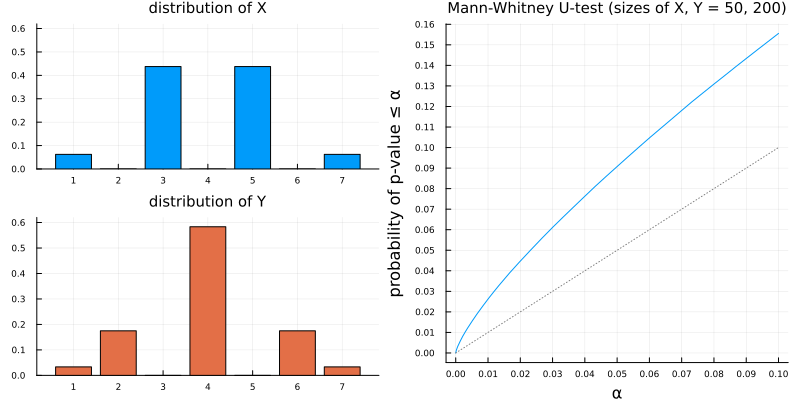

In [10]:
distX = dist7(5/72, 0, 3/8)
distY = dist7(2/45, 3/20, 0)
show_sim(distX, distY, 50, 200)

distX = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.13194444444444445, 0.0, 0.3125, 0.11111111111111116, 0.3125, 0.0, 0.13194444444444445]
)

distY = Categorical{Float64, Vector{Float64}}(
support: Base.OneTo(7)
p: [0.1111111111111111, 0.125, 0.0, 0.5277777777777778, 0.0, 0.125, 0.1111111111111111]
)

(mean(distX), var(distX), kurtosis(distX), mu(6, distX)) = (4.0, 3.0, -0.5555555555555554, 193.0)
(mean(distY), var(distY), kurtosis(distY), mu(6, distY)) = (4.0, 3.0, -0.5555555555555554, 178.0)

ecdf_pval(0.05) = 0.075338



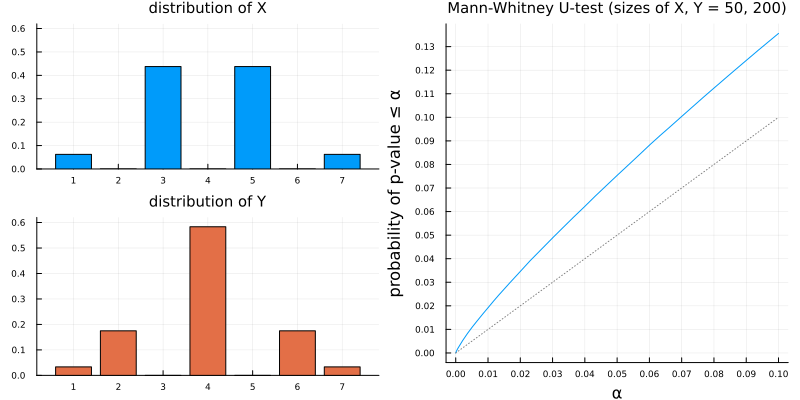

In [11]:
distX = dist7(19/144, 0, 5/16)
distY = dist7(1/9, 1/8, 0)
show_sim(distX, distY, 50, 200)